## 15.4 How to fit a Poisson Regression in R

Similarly to other generalised linear regressions, we fit a Poisson regression through the generalised linear models function glm() where we tell R what the distribution of the errors and linear predictor should be.

You should already be familiar with the glm() function but a quick recap the function syntax is as followed:

    glm(formula, family = gaussian, data, weights, subset,
    na.action, start = NULL, etastart, mustart, offset,
    control = list(…), model = TRUE, method = "glm.fit",
    x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, …)
    
The minimal inputted parameters required is the *formula* and the *family*. The *formula* tells R in a symbolic description what model is required to be fitted and the *family* describes what error distribution and link function are required. As we are going to be fitting Poisson regression the *family* will be “poisson”, however we can also fit a Quasi-Poisson regression also by setting *family* to "quasipoisson".



### 15.4.1 Data for Poisson Regression Example

For the purpose of illustration, we will simulate some data and pretend it comes from a clinical trial. We generate 100 participants ($n$) in three variables. The first is a count variable representing the number of hospital admissions a participant has had in a year and it is created from a Poisson distribution with $lambda=2$. The second is a categorical variable with 4 groups representing the country a participant lives in (England, Northern Ireland, Scotland, Wales) and the last is a binary variable representing which treatment arm the participant was randomised to. Let’s start with simulating the data and looking at some descriptive statistics.


In [5]:
## Simulate Data
set.seed(42)
n<-100
lambda<-6
counts <- rpois(n, lambda)
country <-  factor(sample(1:4, n, replace=T), levels=1:4, labels=c("England","Northern Ireland","Scotland","Wales"))
treatment <- factor(gl(2,n/2), levels=1:2, labels=c("Active Arm", "Placebo Arm"))
print(df <- data.frame(treatment, country, counts))
summary(df)  


      treatment          country counts
1    Active Arm Northern Ireland      9
2    Active Arm            Wales     10
3    Active Arm          England      5
4    Active Arm Northern Ireland      8
5    Active Arm          England      7
6    Active Arm Northern Ireland      6
7    Active Arm            Wales      7
8    Active Arm         Scotland      3
9    Active Arm            Wales      7
10   Active Arm          England      7
11   Active Arm            Wales      6
12   Active Arm          England      7
13   Active Arm            Wales     10
14   Active Arm         Scotland      4
15   Active Arm Northern Ireland      6
16   Active Arm Northern Ireland     10
17   Active Arm         Scotland     11
18   Active Arm          England      3
19   Active Arm          England      6
20   Active Arm Northern Ireland      6
21   Active Arm         Scotland      9
22   Active Arm            Wales      3
23   Active Arm            Wales     12
24   Active Arm Northern Ireland     10


       treatment              country       counts     
 Active Arm :50   England         :27   Min.   : 0.00  
 Placebo Arm:50   Northern Ireland:31   1st Qu.: 4.00  
                  Scotland        :18   Median : 6.00  
                  Wales           :24   Mean   : 6.14  
                                        3rd Qu.: 8.00  
                                        Max.   :12.00  

We can see that we correctly have 100 participants with 50% in the active arm and 50% in the placebo arm. There is roughly equal number of participants in each country with Northern Ireland having slightly more. The number of hospital admissions ranges from 0 to 6 with the median number of admissions equal to 2.

We can now have a look at the descriptive statistics for admission counts by both treatment and county.

In [6]:
#Counts by treatment
with(df, tapply(counts, treatment, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))
#Counts by country
with(df, tapply(counts, country, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

Active Arm            Placebo Arm 
"M (SD) = 6.78 (2.70)" "M (SD) = 5.50 (2.46)"

England       Northern Ireland               Scotland 
"M (SD) = 5.74 (1.87)" "M (SD) = 6.48 (2.34)" "M (SD) = 6.39 (3.07)" 
                 Wales 
"M (SD) = 5.96 (3.42)"

We can see that the Active arm has a slightly higher count mean than the Placebo arm and Scotland also has a slightly higher mean count. We can also look at this graphically using the ggplot package.

also installing the dependency 'rlang'




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE

package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\quant\AppData\Local\Temp\RtmpC6japP\downloaded_packages


installing the source package 'ggplot2'



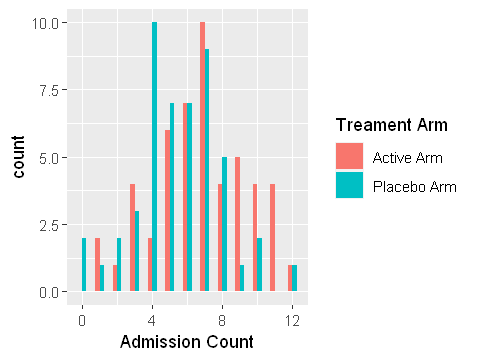

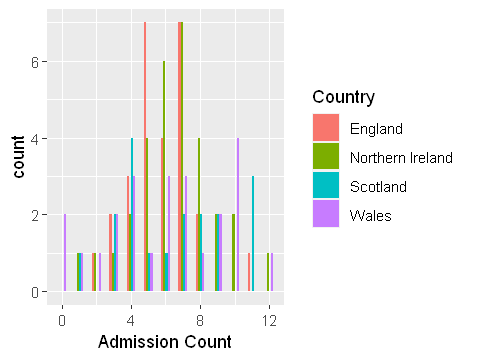

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
install.packages("ggplot2")
library(ggplot2)
g1<-ggplot(df, aes(counts, fill = treatment)) +
  geom_histogram(binwidth=.5, position="dodge")
g1 + labs(fill = "Treament Arm", x="Admission Count")

g2<-ggplot(df, aes(counts, fill = country)) +
  geom_histogram(binwidth=.5, position="dodge")
g2 + labs(fill = "Country", x = "Admission Count")

### 15.4.2 Output from Poisson Regression Example

We already know the admissions count variable follows a Poisson distribution as we have simulated the data directly from the distribution without adding noise. Therefore we know a Poisson regression is suitable. We now fit the regression model and store it in the object m1 and get a summary of the model at the same time.

In [8]:
summary(m1 <- glm(counts ~ treatment + country, family="poisson", data=df))


Call:
glm(formula = counts ~ treatment + country, family = "poisson", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2467  -0.5783   0.0477   0.6381   2.2260  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.82733    0.08448  21.631  < 2e-16 ***
treatmentPlacebo Arm    -0.23187    0.08226  -2.819  0.00482 ** 
countryNorthern Ireland  0.17001    0.10822   1.571  0.11620    
countryScotland          0.14936    0.12396   1.205  0.22822    
countryWales             0.06669    0.11640   0.573  0.56670    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 130.13  on 99  degrees of freedom
Residual deviance: 120.53  on 95  degrees of freedom
AIC: 483.69

Number of Fisher Scoring iterations: 5


**OUTPUT**

The first part of the output gives information on deviance residuals. We would expect to see the deviance residuals to be approximately normally distributed if the model is correctly specified. Here we can see the median is close to 0 (-0.10) and there does not appear to be any skewness as Q1 (quartile 1 = -0.67) and Q3 (quartile 3 = 0.73) have a similar distance from the median and so are the minimum and maximum.

The second part of the output gives the Poisson regression coefficients for each variable with their standard errors, z values, p-values. We interpret Poisson regression coefficients as if there was a one unit change in the predictor variable (if a continuous variable otherwise change from the reference category to the category listed) the regression coefficient tells us the effect on the logs of the expected counts (admission counts in our example), given the other variables in the model are held constant. The coefficient for treatment is -0.40 which tells use the expected log admissions count for being randomised to the active arm compared to the placebo arm is -0.40. The expected log admissions count for the other countries compared to England are all positive. 

We can also see the regression estimate when all the variables in the model are evaluated at zero (or categorical reference group) and this is called the constant and labelled "_cons". In our model this would represent the expected log admissions count for participants in the placebo arm who live in England.

The standard errors are given which are used to calculate the z-value which in turn is used to calculate the p value. The null hypothesis for each p value is that the corresponding regression coefficient is zero given the rest of the variables in the model. The z value here is just the ratio of the coefficient to the standard error for example treatment we can see the estimate/standard error equals the z value: -0.3971/0.1421=-2.795. The z value follows a normal distribution and is tested against a two-sided alternative hypothesis that the coefficient is not equal to zero. We can see for treatment the p value is 0.005 and if we set out alpha significant level at $\alpha=0.05$ we would reject the null hypothesis and conclude the Poisson regression coefficient for treatment is statistically different from zero, given country is in the model. 

Lastly, at the bottom of the output, we have information on the residual deviance which can be used to perform a goodness of fit test for the overall model. We will come back to this in section 14.5.4.


### 15.4.3 Creating robust standard errors from Poisson regression example output.

As previously covered in section 14.2.3.3, the mean of the Poisson distribution is equal to the variance. A publication here (https://onlinelibrary.wiley.com/doi/full/10.1111/1475-4932.12006) recommends using robust standard errors when this assumption is mildly violated. We can create robust standard errors using the sandwich package in R.


In [9]:
#Robust SE's
install.packages("sandwich")
library(sandwich)
cov <- vcovHC(m1, type="HC0")
se <- sqrt(diag(cov))
robust.SE <- cbind(Estimate= coef(m1), "Robust SE" = se, "Pr(>|z|)" = 2 * pnorm(abs(coef(m1)/se)))
robust.SE



  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



,Estimate,Robust SE,Pr(>|z|)
(Intercept),1.82733439,0.06412168,2.000000
treatmentPlacebo Arm,-0.23187287,0.08541705,1.993364
countryNorthern Ireland,0.17000567,0.09156736,1.936635
countryScotland,0.14936415,0.11986847,1.787260
countryWales,0.06668722,0.12436880,1.408183


Here we have the robust standard errors (Robust SE) and the new calculated p values. In this example we see that the robust standard errors are very similar to the previous calculated standard errors, this is because we know the distribution was simulated from a Poisson distribution and hence the mean and variance are approximately the same. However in other settings calculating the robust standard error would lead less bias if the mean and variance were slightly different.  

### 15.4.4 Poisson Regression Goodness of Fit Example

At the bottom of the output we see the null deviance and residual deviance from the model. The residual deviance is 104.71 on 95 degrees of freedom (df). There are 100 observations in our model and 5 estimates which gives us 95 df (100-1df for treatment- 3df for each country – 1df for the constant) . To calculate the p-value for the deviance goodness of fit test we simply calculate the probability to the right of the deviance value for the chi-squared distribution on 95 df.


In [10]:
pchisq(m1$deviance, df=m1$df.residual, lower.tail=FALSE)

[1] 0.03956079

The null hypothesis is that our model is correctly specified. Here we can see the p value is 0.233 which is not significant if we set our level of significant at 0.05. We therefore do not have strong evidence to reject the null hypothesis. If however there was strong evidence that the model was not fitting well, a possible method to improve fit could be to omit a variable from the model which could be adversely affecting the linearity or dispersion criteria. For example we could fit an alternative model where we remove country.

In [11]:
# Update m1 model dropping country
m2 <- update(m1, . ~ . - country)
# Test models with chi square test
anova(m2, m1, test="Chisq")


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
98,123.4508,NA,NA,NA
95,120.5336,3,2.917207,0.4045671


We can see by the non-significant p value of 0.598 that by adding Country to the model we do not get an improve fit and thus the model would fit approximately as well without it. 

### 15.4.5 Poisson Regression Example used for Prediction

One of the great things about regression is it can be used to make predictions, for example we may want to predict what the expected admissions counts would be for each country while assuming everyone is in the placebo treatment. To have a look how this will work we create a small dataset.


In [12]:
dp <- data.frame(treatment = factor(1, levels=1, labels=c("Placebo Arm")), country = factor(1:4, levels = 1:4, labels = levels(df$country)))
dp

treatment,country
Placebo Arm,England
Placebo Arm,Northern Ireland
Placebo Arm,Scotland
Placebo Arm,Wales


We now use the output from the regression to predict the admissions counts for each country.

In [13]:
predict(m1, dp, type="response", se.fit=TRUE)

$fit
       1        2        3        4 
4.930604 5.844302 5.724903 5.270624 

$se.fit
        1         2         3         4 
0.4830472 0.4716294 0.5838867 0.5027216 

$residual.scale
[1] 1

In the output we can see the predicted number of admissions counts for each country assuming everyone is taking placebo treatment. Scotland has the highest predicted count with England having the lowest. We can also graphically show predictions for different permutations of data.

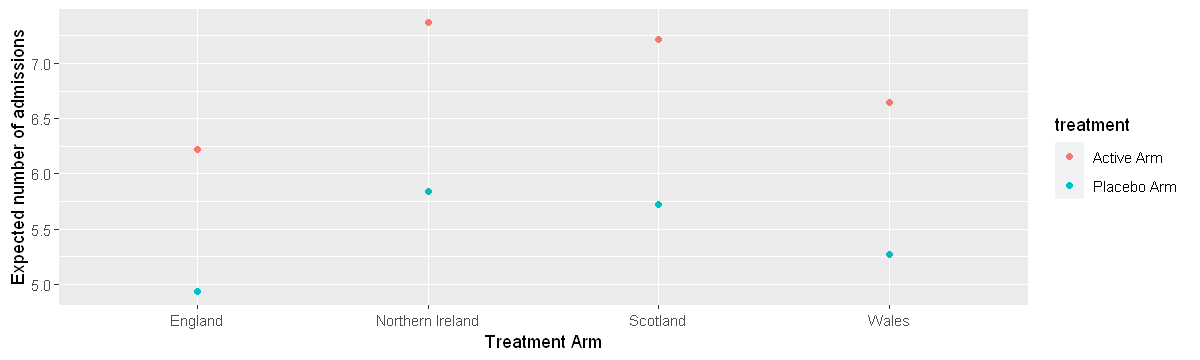

In [14]:
options(repr.plot.width=10, repr.plot.height=3)
## Calculate and store predicted values
df$pred <- predict(m1, type="response")

# Create the plot
ggplot(df, aes(x = country, y = pred, colour = treatment)) +
  geom_point(aes(y = pred)) + labs(x = "Treatment Arm", y = "Expected number of admissions")


Here we can see graphically the predicted admissions count for each country for each treatment arm, to have the lowest predicted number of hospital admissions you would want to be living in England and in the Placebo arm.